## **Data Cleaning and Exploratory Analysis of Global Superstore Sales for Business Optimization**

### **PROBLEM STATEMENT**
The Global Superstore Sales Dataset contains transaction records of a multinational retail chain over several years. However, the dataset includes missing values, duplicate records, and incorrect data, making data cleaning a crucial step before analysis. The goal is to clean and preprocess the data by handling null values, detecting and removing duplicates, and correcting inconsistencies. Once cleaned, the dataset will be used to analyze sales performance, customer trends, and profit patterns across different regions. Through exploratory data analysis and visualizations, we will uncover sales trends, customer buying behavior, and high-profit product categories. Finally, using statistical techniques, we will evaluate factors influencing profitability and delivery efficiency to optimize business strategies.

### **OBJECTIVES**
1. **Data Cleaning & Preprocessing:**
   - Identify and handle missing values appropriately.
   - Detect and remove duplicate records.
   - Correct inconsistencies in data (e.g., formatting errors, invalid entries).
   - Convert data types to their appropriate formats for analysis.

2. **Exploratory Data Analysis (EDA):**
   - Analyze sales performance across different regions and time periods.
   - Identify customer buying trends and segment customers based on purchasing behavior.
   - Determine high-revenue and high-profit product categories.
   - Visualize trends using charts and graphs for better insights.

3. **Statistical Analysis:**
   - Evaluate key factors affecting profitability and sales trends.
   - Analyze delivery efficiency and its impact on customer satisfaction.
   - Identify relationships between different attributes (e.g., sales vs. discount impact on profit).

4. **Business Insights & Recommendations:**
   - Provide data-driven recommendations to optimize pricing, inventory, and supply chain.
   - Suggest strategies to improve customer retention and sales growth.
   - Highlight areas of inefficiency and propose solutions for operational improvements.



#### **1) Importing relevant libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import color_palette


#### **2) LOADING OUR 'global_superstore_sales_messy' DATASET**


In [10]:
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Python_datasets\INT-375\global_superstore_sales_messy.csv')
print(df.head())  # Printing the dataset

  Order ID  Order Date   Ship Date       Ship Mode Customer ID Customer Name  \
0  ORD1000  2020-01-01  2020-01-08  Standard Class    CUST5000   Alice Smith   
1  ORD1001  2020-01-02  2020-01-06        Same Day    CUST5001      John Doe   
2  ORD1002  2020-01-03  2020-01-11        Same Day    CUST5002  Emma Johnson   
3  ORD1003  2020-01-04  2020-01-09  Standard Class    CUST5003  Robert Brown   
4  ORD1004  2020-01-05  2020-01-12  Standard Class    CUST5004   Alice Smith   

       Segment   Region  Country         Category Sub-Category  \
0     Consumer     West  Germany        Furniture       Phones   
1    Corporate    South      USA       Technology       Phones   
2  Home Office  Central       UK  Office Supplies  Accessories   
3     Consumer    South   Mexico       Technology       Tables   
4    Corporate    South      USA       Technology      Binders   

      Product Name  Quantity  Discount   Sales  Profit Delivery Status  
0    Standing Desk         8      0.25  491.06  1

 #### **3) EXPLORING THE DATASET**

In [11]:
print("Information of the Dataset:",df.info())
print("Description of the Dataset:", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         4700 non-null   object 
 1   Order Date       4700 non-null   object 
 2   Ship Date        4700 non-null   object 
 3   Ship Mode        4700 non-null   object 
 4   Customer ID      4700 non-null   object 
 5   Customer Name    4589 non-null   object 
 6   Segment          4700 non-null   object 
 7   Region           4700 non-null   object 
 8   Country          4700 non-null   object 
 9   Category         4700 non-null   object 
 10  Sub-Category     4700 non-null   object 
 11  Product Name     4700 non-null   object 
 12  Quantity         4700 non-null   int64  
 13  Discount         4700 non-null   float64
 14  Sales            4597 non-null   float64
 15  Profit           4599 non-null   float64
 16  Delivery Status  4700 non-null   object 
dtypes: float64(3),

#### **4) HANDLING THE MISSING VALUES**

In [12]:
print("Missing Values Before Cleaning:\n", df.isnull().sum())

df["Sales"] = df["Sales"].fillna(df["Sales"].mean())         # Fill Sales with mean
df["Profit"] = df["Profit"].fillna(df["Profit"].median())       # Fill Profit with median
df["Customer Name"] = df["Customer Name"].fillna(df["Customer Name"].mode()[0])     # Fill Name with mode

df.replace("", pd.NA, inplace=True)          # Convert empty strings to NaN
df.dropna(inplace=True)          # Remove remaining NaNs

print("Missing Values After Cleaning:\n", df.isnull().sum())

print(df)           ## Printing the cleaned dataset


Missing Values Before Cleaning:
 Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name      111
Segment              0
Region               0
Country              0
Category             0
Sub-Category         0
Product Name         0
Quantity             0
Discount             0
Sales              103
Profit             101
Delivery Status      0
dtype: int64
Missing Values After Cleaning:
 Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Region             0
Country            0
Category           0
Sub-Category       0
Product Name       0
Quantity           0
Discount           0
Sales              0
Profit             0
Delivery Status    0
dtype: int64
     Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0     ORD1000  2020-01-01  2020-01-08  Standard Class    CUST5000   
1     ORD1001  2020-01-

#### **5) PERFORMING SOME BASIC OPERATIONS**

In [13]:
print("First 20 rows of the dataset : ",df.head(20))
print("Last 20 rows of the dataset : ",df.tail(20))
print("Shape of the dataset : ",df.shape)
print("Datatype of the dataset : ",df.dtypes)


First 20 rows of the dataset :     Order ID  Order Date   Ship Date       Ship Mode Customer ID Customer Name  \
0   ORD1000  2020-01-01  2020-01-08  Standard Class    CUST5000   Alice Smith   
1   ORD1001  2020-01-02  2020-01-06        Same Day    CUST5001      John Doe   
2   ORD1002  2020-01-03  2020-01-11        Same Day    CUST5002  Emma Johnson   
3   ORD1003  2020-01-04  2020-01-09  Standard Class    CUST5003  Robert Brown   
4   ORD1004  2020-01-05  2020-01-12  Standard Class    CUST5004   Alice Smith   
5   ORD1005  2020-01-06  2020-01-09  Standard Class    CUST5005      John Doe   
6   ORD1006  2020-01-07  2020-01-14     First Class    CUST5006  Emma Johnson   
7   ORD1007  2020-01-08  2020-01-16     First Class    CUST5007      John Doe   
8   ORD1008  2020-01-09  2020-01-14        Same Day    CUST5008   Alice Smith   
9   ORD1009  2020-01-10  2020-01-14     First Class    CUST5009      John Doe   
10  ORD1010  2020-01-11  2020-01-19    Second Class    CUST5010  Emma Johnson

#### **6) Handling Duplicates**

In [12]:
print(f"Duplicate rows: {df.duplicated().sum()}")           # Check for duplicates
df.drop_duplicates(inplace=True)                # Remove duplicates

Duplicate rows: 196


#### **7) Converting datatypes**

In [14]:
df["Order Date"] = pd.to_datetime(df["Order Date"])         # Convert Order Date column to datetime

#### **8) Fixing inconsistencies**

In [14]:
print("Unique Categories : ",df["Category"].unique())              # Check unique values
df["Category"] = df["Category"].str.strip().str.title()             # Fix inconsistent category names

Unique Categories :  ['Furniture' 'Technology' 'Office Supplies']



#### **9) Final Cleaned Data**

In [15]:
import pandas as pd
df.to_csv("Cleaned_Data.csv", index=False)
print("Saved Successfully")

Saved Successfully


#### **10) Statistical Analysis**

In [16]:
## CENTRAL TENDENCY
print("Mean sales : ",df['Sales'].mean())
print("Median Profit : ",df['Profit'].median())
print("Mode Segment : ",df['Segment'].mode()[0])

Mean sales :  245.8167217750707
Median Profit :  13.5
Mode Segment :  Corporate


In [17]:
## DISPERSION
print("Standard Deviation of Profit : ",df['Profit'].std())
print("Variance of sales : ",df['Sales'].var())
print("Range of quantity : ",df['Quantity'].max()-df['Quantity'].min())

Standard Deviation of Profit :  68.87237224785106
Variance of sales :  23391.788538475666
Range of quantity :  8


In [18]:
## UNDERSTANDING THE SHAPE AND DISTRIBUTION OF DATA
print("Sales Skewness:", df['Sales'].skew())
print("Profit Kurtosis:", df['Profit'].kurtosis())

Sales Skewness: -0.5087794856684305
Profit Kurtosis: 0.32861576387452995


               Quantity  Discount     Sales    Profit  Profit_Margin
Quantity       1.000000  0.041050 -0.008615 -0.030684      -0.035915
Discount       0.041050  1.000000  0.003491  0.009180       0.010736
Sales         -0.008615  0.003491  1.000000  0.167419       0.030109
Profit        -0.030684  0.009180  0.167419  1.000000       0.830592
Profit_Margin -0.035915  0.010736  0.030109  0.830592       1.000000


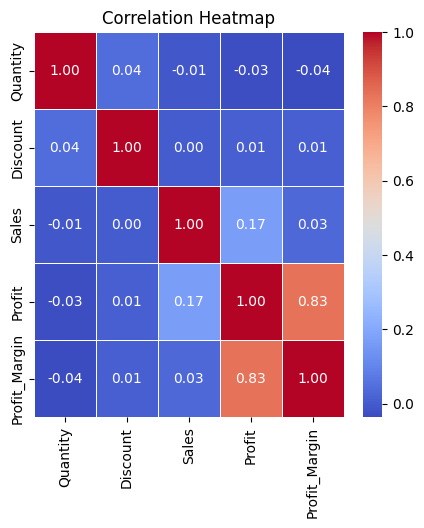

In [31]:
## CORRELATION ANALYSIS
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",fmt='.2f',linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
## COMPARING MEAN AND DISTRIBUTIONS ACROSS CATEGORIES
df.groupby('Region')['Profit'].mean().sort_values()

## IDENTIFYING WHICH REGION IS MOST PROFITABLE BASED ON AVERAGE
df.groupby('Segment')['Sales'].agg(['mean', 'median', 'std'])

,mean,median,std
Segment,,,
Consumer,247.928258,248.190,155.926287
Corporate,246.979705,245.995,158.256901
Home Office,242.526634,244.650,144.204731


                         Sales    Profit  Total Orders
Category                                              
Furniture        377385.338375  39318.09          1571
Office Supplies  380436.408540  37929.54          1510
Technology       397516.845427  38320.70          1619


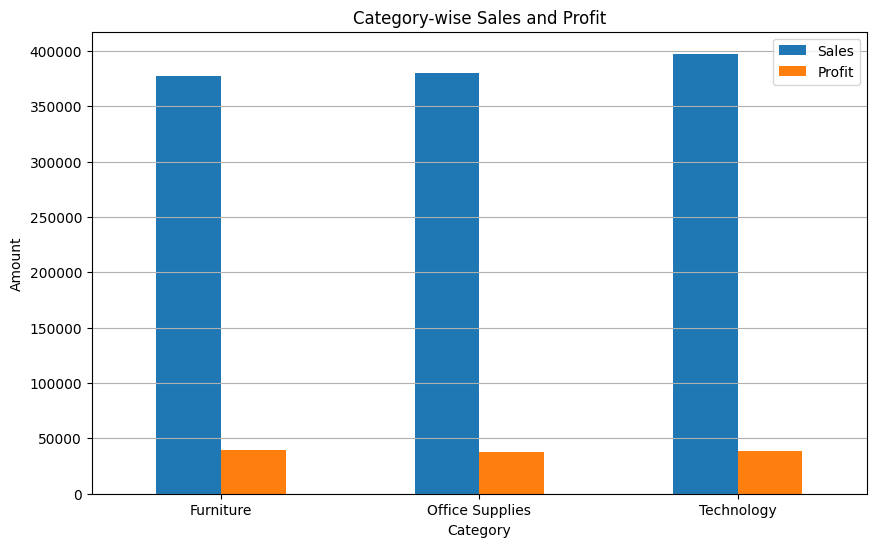

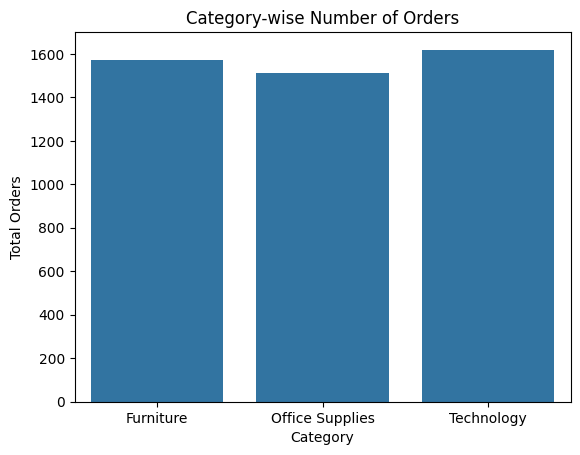

In [22]:
## GROUPING AND VISUALIZING CATEGORY-WISE REVENUE, PROFIT & SALES
category_summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'   # Assuming 'Order ID' exists for counting sales
}).rename(columns={'Order ID': 'Total Orders'})
print(category_summary)

## A) Bar plot for Sales & Profit by Category
category_summary[['Sales', 'Profit']].plot(kind='bar', figsize=(10,6))
plt.title('Category-wise Sales and Profit')
plt.ylabel('Amount')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## B) Bar plot for Total Orders per Category
sns.barplot(x=category_summary.index, y=category_summary['Total Orders'])
plt.title('Category-wise Number of Orders')
plt.ylabel('Total Orders')
plt.xlabel('Category')
plt.show()



##### **Profit Margin and Cost estimation**

In [23]:
df['Profit_Margin'] = df['Profit'] / df['Sales']
df.groupby('Category')['Profit_Margin'].mean().sort_values(ascending=False)


Category
Furniture          0.098715
Office Supplies    0.097090
Technology         0.091303
Name: Profit_Margin, dtype: float64

##### **Discount Impact Analysis**

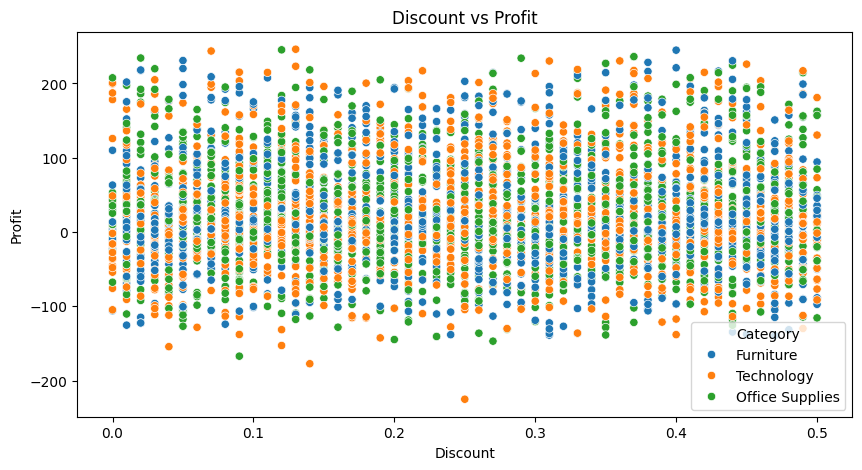

,Discount,Profit
Discount,1.00000,0.00918
Profit,0.00918,1.00000


In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.show()

df[['Discount', 'Profit']].corr()


##### **High and Low Performing Products**

In [27]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
bottom_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
print("Top performing Products : \n",top_products)
print("Bottom performing Products : \n",bottom_products)

Top performing Products : 
 Product Name
USB Drive          26739.61
Office Chair       23645.35
Notebook Binder    23107.04
Standing Desk      21524.87
Smartphone         20551.46
Name: Profit, dtype: float64
Bottom performing Products : 
 Product Name
Smartphone         20551.46
Standing Desk      21524.87
Notebook Binder    23107.04
Office Chair       23645.35
USB Drive          26739.61
Name: Profit, dtype: float64


##### **Trend analysis over time**

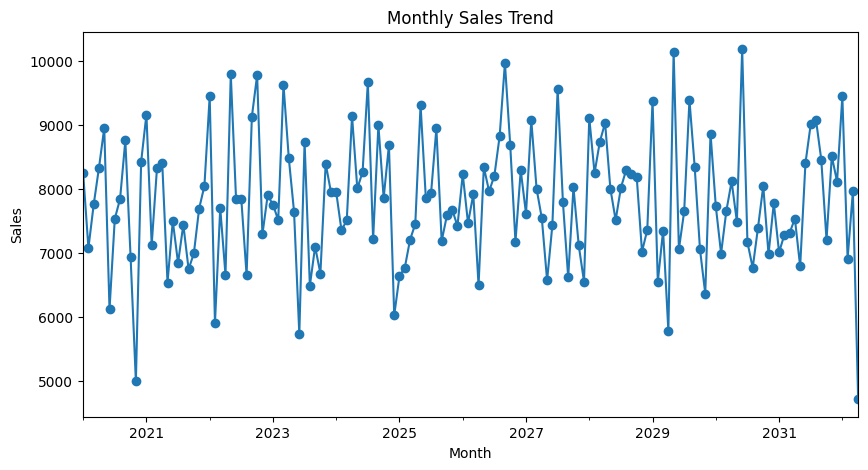

In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()


##### **Regional Performance Comparision**

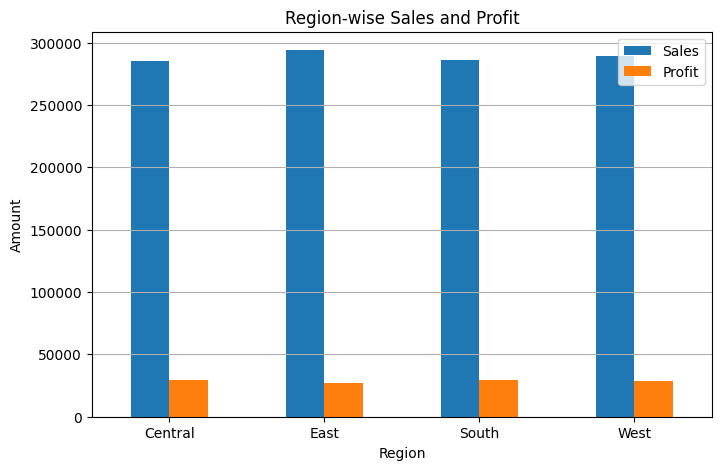

In [29]:
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum()
region_perf.plot(kind='bar', figsize=(8,5))
plt.title('Region-wise Sales and Profit')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


##### **Profitability Heatmap by Segment & Category**

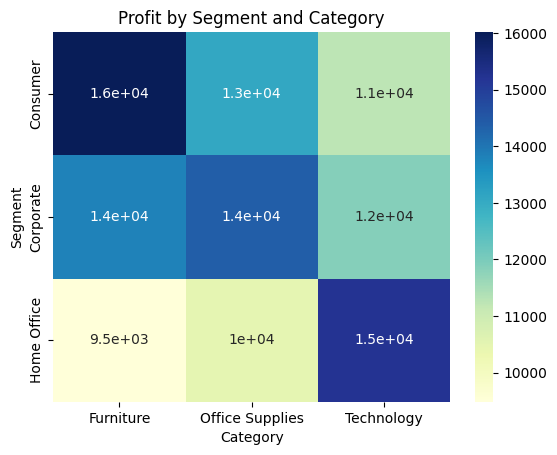

In [30]:
pivot = df.pivot_table(index='Segment', columns='Category', values='Profit', aggfunc='sum')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Profit by Segment and Category')
plt.show()


##### **Pareto Analysis : Identifying whether a small number of products/customers drive most of the sales.**

In [42]:
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
product_sales.cumsum() / product_sales.sum()  # Plot this for pareto curve


Product Name
Notebook Binder    0.217164
USB Drive          0.425660
Smartphone         0.618991
Standing Desk      0.809751
Office Chair       1.000000
Name: Sales, dtype: float64

#### **11) Uni-Variate Analysis**

<Axes: xlabel='Sales', ylabel='Count'>

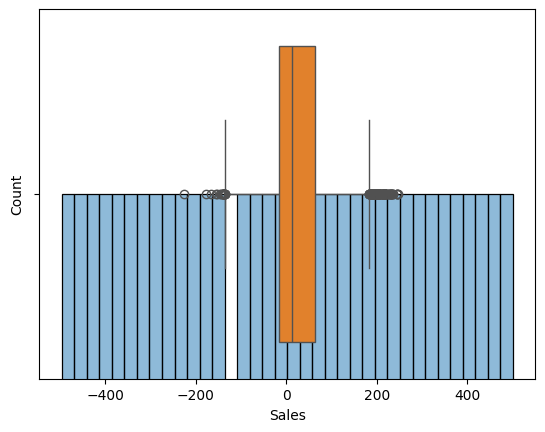

In [45]:
sns.histplot(df['Sales'], kde=True)
sns.boxplot(x=df['Profit'])


#### **12) Bi-Variate Analysis**

,Sales,Profit,Discount
Sales,1.000000,0.167419,0.003491
Profit,0.167419,1.000000,0.009180
Discount,0.003491,0.009180,1.000000


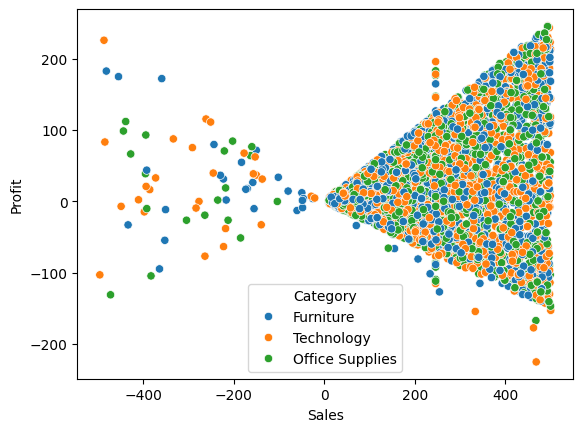

In [46]:
## Numerical v/s Numerical
sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=df['Category'])
df[['Sales', 'Profit', 'Discount']].corr()


<Axes: xlabel='Region', ylabel='Profit'>

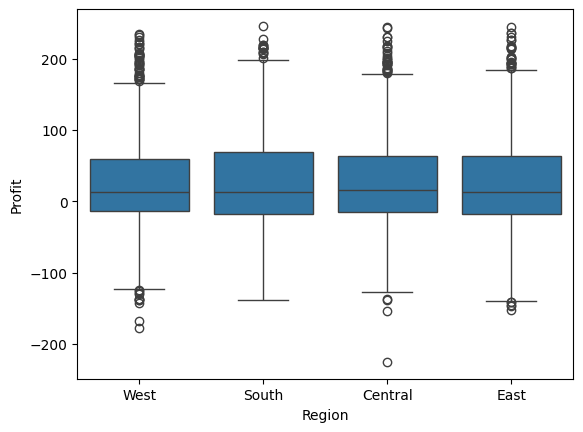

In [47]:
## Categorical v/s Numerical
sns.boxplot(x='Region', y='Profit', data=df)